In [2]:
import autograd.numpy as np
from autograd import grad 
import os.path,requests
import matplotlib.pyplot as plt

https://www.youtube.com/watch?v=JRlyw6LO5qo

In [3]:
def get_data(url):
    if not os.path.isfile('data.npz'):
        print("Downloading")
        r=requests.get(url).content
        open('data.npz', 'wb').write(r)
        
        data = np.load('data.npz')
        return(data)
    else:
        open('data.npz', 'rb')
        data = np.load('data.npz')
        return(data)
    
mnist = get_data('https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz' )

In [4]:
x_train = mnist['x_train'].reshape((-1,28*28))/255
y_train = mnist['y_train']
x_test = mnist['x_test'].reshape((-1,28*28))/255
y_test = mnist['y_test']

In [5]:
def one_hot(x):
    #https://github.com/keras-team/keras/blob/2d183db0372e5ac2a686608cb9da0a9bd4319764/keras/utils/np_utils.py#L9
    a=np.zeros((x.shape[0], np.max(x)+1), dtype=np.float32)
    a[np.arange(x.shape[0]),x]=1
    return(a)

#https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/

In [6]:
y_train=one_hot(y_train)
y_test=one_hot(y_test)

In [7]:
x_train.shape

(60000, 784)

In [8]:
w1 = np.random.randn(784,128)*np.sqrt(2./784)
w2 = np.random.randn(128,10)*np.sqrt(2./128)

In [9]:
def relu(x):  
    v=np.maximum(np.zeros((x.shape)),x)
    return(v)

In [10]:
def dense(x,w1,b=-1):
    v=np.dot(x,w1) + b
    return(v)

In [11]:
def softmax(x):
    #https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html
    #https://pytorch.org/docs/stable/generated/torch.nn.LogSoftmax.html
    #https://github.com/keras-team/keras/blob/2d183db0372e5ac2a686608cb9da0a9bd4319764/keras/activations.py
    #https://www.tensorflow.org/api_docs/python/tf/nn/softmax
    #https://github.com/keras-team/keras/blob/2d183db0372e5ac2a686608cb9da0a9bd4319764/keras/backend/tensorflow_backend.py
    probs = np.exp(x)/np.sum( np.exp(x), axis=-1,keepdims=True)
    return(probs)

In [12]:
def get_ypred(ypred):
    
    agmax = np.argmax(ypred,axis=-1)
    
    return(agmax)

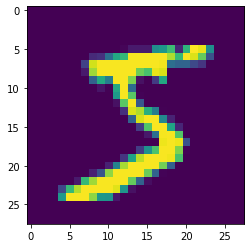

In [13]:
im=x_train[0].reshape(28,28)
plt.imshow(im)

In [15]:

def logsumexp(x):
    #http://gregorygundersen.com/blog/2020/02/09/log-sum-exp/
    c = np.max(x)
    e = np.exp(x-c)
    p = c + np.log(np.sum(e))
    
    return(p)
    

In [14]:
#https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/loss-functions/categorical-crossentropy
def crossentropy(y,y_pred):
    loss = np.sum(-1*y*np.log(y_pred))/y.shape[0]    
    return(loss)

In [16]:
def model(x_train,params):
    
    w1,w2 = params 

    xd1 = dense(x_train,w1)
    xd1_relu = relu(xd1)
    xd2 = dense(xd1_relu,w2)
    #xd2_smax = softmax(xd2)+0.001
    xd2_smax = np.exp(xd2 - logsumexp(xd2))
    
    return(xd2_smax)

In [17]:
def Optim(x_train,y_train,params):
    
    y_pred = model(x_train,params)
    
    cost = crossentropy(y_train,y_pred)
    
    return(cost)

In [18]:
Optim(x_train[0:100],y_train[0:100],[w1,w2])

6.915672828223263

In [19]:
cost_fun = lambda params: Optim(x_train[0:10000],y_train[0:10000],params)
deriv = grad(cost_fun)
#https://fr.wikipedia.org/wiki/Gradient

w1 = np.random.randn(784,128)*np.sqrt(2./784)
w2 = np.random.randn(128,10)*np.sqrt(2./128)


batch_size = 100 
n_samples = x_train.shape[0]
n_iter = n_samples//batch_size

epochs = 10

l = []
acc = []

for i in range(epochs):
    print(i,'/',epochs)
    for j in range(n_iter):
        
        start = j*batch_size
        end = (j+1)*batch_size
        
        cost_fun = lambda params: Optim(x_train[start:end],y_train[start:end],params)
        deriv = grad(cost_fun)
        
        
        l.append(Optim(x_train[start:end],y_train[start:end],[w1,w2]))
        acc.append(np.sum(np.argmax(model(x_test,[w1,w2]),axis=1)==np.argmax(y_test,axis=1))/100)

        s = deriv([w1,w2])
        w1 = w1 - 0.2*s[0]
        w2 = w2 - 0.2*s[1]
    

0 / 10
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10


In [20]:
np.sum(np.argmax(model(x_test,[w1,w2]),axis=1)==np.argmax(y_test,axis=1))/100

95.72

In [21]:
epochs*n_iter

6000

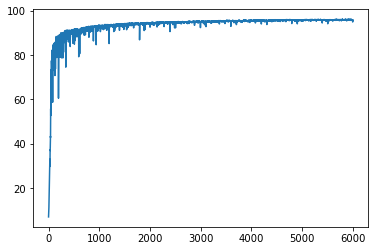

In [22]:
plt.plot(np.arange(epochs*n_iter),acc)

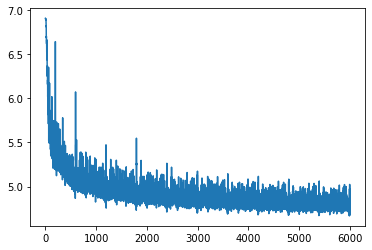

In [23]:
plt.plot(np.arange(epochs*n_iter),l)

https://github.com/geohot/ai-notebooks/blob/master/mnist_from_scratch.ipynb

https://github.com/HIPS/autograd/blob/master/autograd/misc/optimizers.py


https://blog.feedly.com/tricks-of-the-trade-logsumexp/

In [24]:
# Backprop
#https://math.stackexchange.com/questions/945871/derivative-of-softmax-loss-function
#1) Loss
#2) Softmax/LogSoftmax
#3) Relu 2 / W
#4) Reli1 / W